In [ ]:
#!pip install matplotlib numpy scipy

import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Create output directory if it doesn't exist
output_dir = '../data/spectrograms/1'
os.makedirs(output_dir, exist_ok=True)

# Function to generate and save spectrogram
def generate_spectrogram(file_path, output_dir):
    sample_rate, samples = wavfile.read(file_path)
    spectrogram, frequencies, times, image = plt.specgram(samples, Fs=sample_rate)
    #plt.show()
    return spectrogram, frequencies, times
    
    
# Process each .wav file in the input directory
input_dir = '../data/pilot01_data/1'
for file_name in os.listdir(input_dir):
    #print(file_name)
    if file_name.endswith('.WAV'):
        print(file_name)
        file_path = os.path.join(input_dir, file_name)
        spectrogram, frequencies, times = generate_spectrogram(file_path, output_dir)
        up_freq_limit = 9500
        low_freq_limit = 900
        cropped_freq_index = np.where((frequencies >= low_freq_limit) & (frequencies <= up_freq_limit))[0]
        # Crop the spectrogram and frequencies
        cropped_spectrogram = spectrogram[cropped_freq_index, :]
        cropped_frequencies = frequencies[cropped_freq_index]

        np.save(os.path.join(output_dir, f"{os.path.splitext(file_name)[0]}.npy"), cropped_spectrogram)
        

20240628_041200.WAV
20240705_042300.WAV


/var/folders/h2/933xpyn94hj1ff1zb7v1vw3c0000gp/T/ipykernel_1110/3859392843.py:14: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sample_rate, samples = wavfile.read(file_path)


20240701_184500.WAV
20240626_042300.WAV
20240625_205200.WAV
20240705_191400.WAV
20240630_182800.WAV
20240708_052500.WAV
20240704_201400.WAV
20240707_034800.WAV
20240710_184700.WAV
20240629_044300.WAV
20240707_033000.WAV
20240703_033900.WAV
20240703_045100.WAV
20240627_185800.WAV
20240702_052000.WAV
20240625_194600.WAV
20240706_052900.WAV
20240709_034400.WAV
20240707_183700.WAV
20240625_052900.WAV
20240710_041500.WAV
20240711_202200.WAV
20240628_184000.WAV
20240701_200900.WAV
20240703_050900.WAV
20240626_183400.WAV
20240707_050000.WAV
20240711_054000.WAV
20240709_040800.WAV
20240630_204000.WAV
20240707_052400.WAV
20240630_054300.WAV
20240626_031700.WAV
20240709_055000.WAV
20240708_034900.WAV
20240702_183300.WAV
20240629_192800.WAV
20240708_033100.WAV
20240628_202800.WAV
20240628_043600.WAV
20240708_183600.WAV
20240704_034600.WAV
20240708_050100.WAV
20240703_182700.WAV
20240701_193900.WAV
20240709_190000.WAV
20240706_034700.WAV
20240706_203100.WAV
20240625_184000.WAV
20240702_042600.WAV


KeyboardInterrupt: 

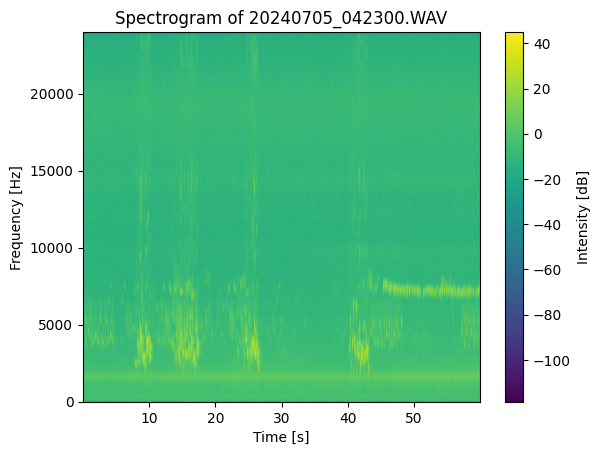

In [14]:
plt.imshow(10 * np.log10(spectrogram), aspect='auto', extent=[times.min(), times.max(), frequencies.min(), frequencies.max()], origin='lower')
plt.colorbar(label='Intensity [dB]')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.title(f'Spectrogram of {file_name}')
plt.show()

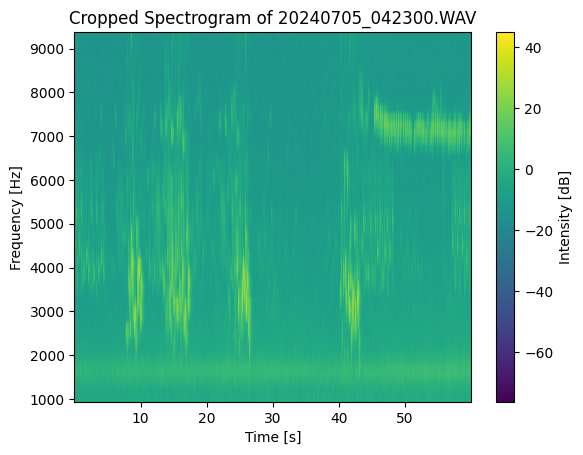

In [ ]:
# Find the index where frequency is greater than 9500 Hz
up_freq_limit = 9500
low_freq_limit = 900
cropped_freq_index = np.where((frequencies >= low_freq_limit) & (frequencies <= up_freq_limit))[0]



# Crop the spectrogram and frequencies
cropped_spectrogram = spectrogram[cropped_freq_index, :]
cropped_frequencies = frequencies[cropped_freq_index]

# Plot the cropped spectrogram
plt.imshow(10 * np.log10(cropped_spectrogram), aspect='auto', extent=[times.min(), times.max(), cropped_frequencies.min(), cropped_frequencies.max()], origin='lower')
plt.colorbar(label='Intensity [dB]')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.title(f'Cropped Spectrogram of {file_name}')
plt.show()